# Logistic Regression

In this exercise we'll try to build a Logistic Regression (LoR) model that predicts whether a number is greater than 10 or not.

For this purpose we will perform a usual Linear Regression and add a sigmoid function in the end to convert the predcitions in range of [0, 1] inclusive. Also note that as our objective is changing our Cost Function will also change.

[Linear Regression Notebook](https://github.com/DevavratSinghBisht/devwithdev.deeplearning_playlist/blob/main/1.%20Linear%20Regression.ipynb) is a prerequisite for this notebook. If you haven't been through it, please find it in the repo. See you again after you have completet it 😉

## Creating Dummy Data

In [1]:
import numpy as np

In [17]:
greater_than = 10

# epsilon is used to avoid division by zero error
eps = 1e-8

# Learning rate is just a small multiple that is used while updating the weights.
# It is used to adjust how big or small updates we want to do at each step. 
lr = 0.009

lst = [i for i in range(0,10)]

X_train = np.array(lst) * 2
y_train = (X_train > greater_than) * 1

X_test = np.array(lst) * 2 + 1
y_test = (X_test > greater_than) * 1

print('X train set (Number of refills):', X_train)
print('y train set (Total cost)       :', y_train)

print('X test  set (Number of refills):', X_test)
print('y test  set (Total cost)       :', y_test)

X train set (Number of refills): [ 0  2  4  6  8 10 12 14 16 18]
y train set (Total cost)       : [0 0 0 0 0 0 1 1 1 1]
X test  set (Number of refills): [ 1  3  5  7  9 11 13 15 17 19]
y test  set (Total cost)       : [0 0 0 0 0 1 1 1 1 1]


## Differences from Linear Regression

### Sigmoid Function
The sigmoid function has a domain of (-inf, inf) and range of [0 , 1]. Thus it is used to classify the inputs into 2 classes 0 or 1.

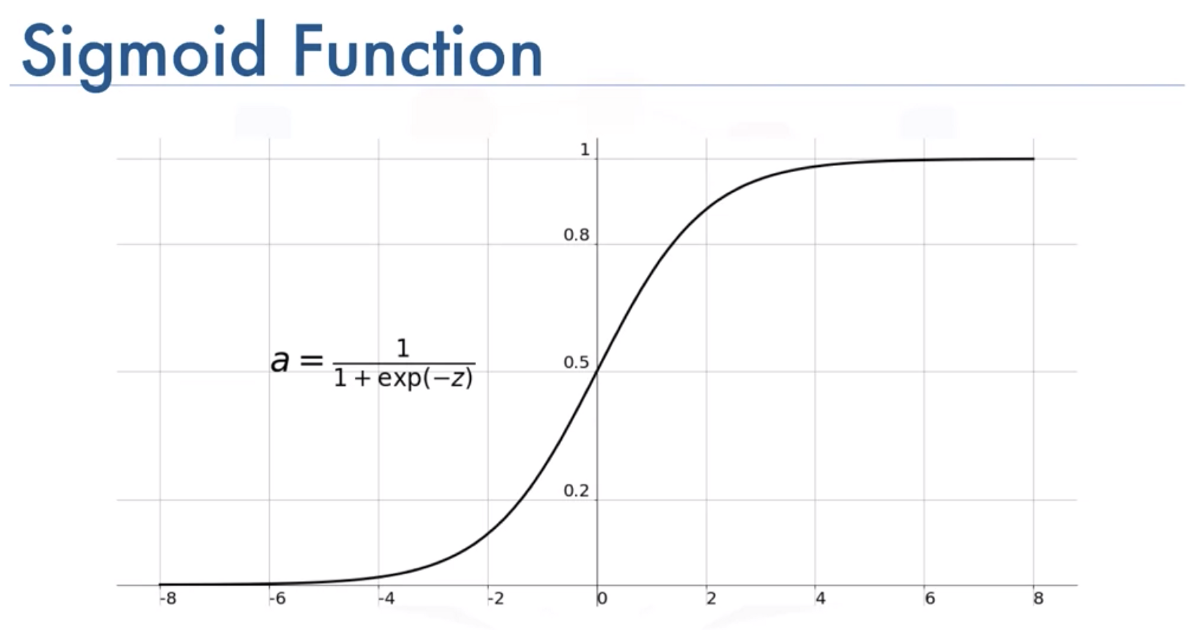

In [3]:
# assuming the values for demonstration

y = 1
x = 5
m = 0
b = 0.5

num_data_points = 1

In [4]:
# you can play around with the sigmoid function here

z = m*x + b
y_hat = 1/(1 + np.exp(-z))
print(f"Sigmoid of {z} is {y_hat}")

Sigmoid of 0.5 is 0.6224593312018546


### Cost Function

In [5]:
# assuming the values of y and y_hat (predicted value)
# you can play with it

error = -(np.sum((y * np.log(y_hat + eps)) + ((1- y) * np.log((1 - y_hat + eps)))))

print(f"Log Error for y = {y} and y_hat = {y_hat} is {error}")

Log Error for y = 1 and y_hat = 0.6224593312018546 is 0.4740769681148001


### Weight Updates

In [6]:
delta_b = np.sum((((1-y)/(1 - y_hat + eps)) - (y/y_hat + eps)) * np.power(y_hat, 2) * np.exp(-z))/ num_data_points
delta_m = np.sum((((1-y)/(1 - y_hat + eps)) - (y/y_hat + eps)) * np.power(y_hat, 2) * np.exp(-z) * x)/ num_data_points

b = b - (lr * delta_b)
m = m - (lr * delta_m)

print(f"Update factors are dalta_b : {delta_b}, delta_m:{delta_m}")
print(f"Updated values are    b    : {b},    m   :{m}")

Update factors are dalta_b : -0.3775406711481825, delta_m:-1.8877033557409126
Updated values are    b    : 0.5033978660403337,    m   :0.016989330201668214


## Building the Model

In [24]:
class LoR_Model:
    def __init__(self, X_train, y_train, epoch, lr):
        
        self.x = X_train
        self.y = y_train
        self.epoch = epoch
        self.lr = lr
        
        # let m and b be zero by default
        self.m = 0
        self.b = 0
        
        
        # logarithmic error
        self.log_error = 0
        # empty array for storing errors
        self.error_log = np.array([])
        
        # number of data points
        self.len = len(y_train)
        
        # used to store the output before sigmoid activiation
        self.z = np.array([])
        
        # epsilon is used to avoid division by zero error
        self.eps = 1e-8
    
    def sigmoid(self, z):
        y = 1/(1 + np.exp(-z))
        return y
    
    def for_prop(self):
        self.z = self.x*self.m + self.b
        self.pred = self.sigmoid(self.z)
    
    def calc_log_error(self):
        self.error = -(np.sum((self.y * np.log(self.pred + self.eps)) + ((1- self.y) * np.log((1 - self.pred + self.eps)))))
        
    def back_prop(self):
        self.b -= self.lr*np.sum((((1-self.y)/(1 - self.pred + self.eps)) - (self.y/self.pred + self.eps)) * np.power(self.pred, 2) * np.exp(-self.z))/ self.len
        self.m -= self.lr*np.sum((((1-self.y)/(1 - self.pred + self.eps)) - (self.y/self.pred + self.eps)) * np.power(self.pred, 2) * np.exp(-self.z) * self.x)/ self.len
        
    def train(self):
        for i in range(self.epoch):
            self.for_prop()
            self.calc_log_error()
            self.back_prop()
            print("Epoch =", i, " Error =", self.error)
        
    def predict(self, X_test):
        
        pred = self.sigmoid(X_test*self.m + self.b)
        return pred
        

## Training the Model

In [34]:
model = LoR_Model(X_train, y_train, 2000, 0.1)

In [35]:
model.train()

Epoch = 0  Error = 6.931471605599454
Epoch = 1  Error = 7.375096757291288
Epoch = 2  Error = 7.164691859575633
Epoch = 3  Error = 7.9167038052740715
Epoch = 4  Error = 7.03881911486865
Epoch = 5  Error = 7.759253452840211
Epoch = 6  Error = 6.938855776319976
Epoch = 7  Error = 7.646336854038152
Epoch = 8  Error = 6.834599567213913
Epoch = 9  Error = 7.5232310067705
Epoch = 10  Error = 6.734812301716211
Epoch = 11  Error = 7.405997003004478
Epoch = 12  Error = 6.636993155043923
Epoch = 13  Error = 7.290157542393172
Epoch = 14  Error = 6.541707239805881
Epoch = 15  Error = 7.1768362755302535
Epoch = 16  Error = 6.448730977937828
Epoch = 17  Error = 7.065710702734514
Epoch = 18  Error = 6.358032190892657
Epoch = 19  Error = 6.956807631063861
Epoch = 20  Error = 6.269536730825235
Epoch = 21  Error = 6.850074764147478
Epoch = 22  Error = 6.183180471554103
Epoch = 23  Error = 6.745476163130425
Epoch = 24  Error = 6.098898746386693
Epoch = 25  Error = 6.642972733408976
Epoch = 26  Error = 6.0

## Predictions and Observations

### Train data

In [36]:
pred = model.predict(X_train)
print('\nPredicted values :\n', pred)
print('\n Actual values :\n', y_train)


Predicted values :
 [4.53681918e-04 1.90969293e-03 8.00110639e-03 3.28823847e-02
 1.25359879e-01 3.76632871e-01 7.18067197e-01 9.14796065e-01
 9.78382820e-01 9.94785956e-01]

 Actual values :
 [0 0 0 0 0 0 1 1 1 1]


In [37]:
print('Converting predictions into 1s and 0s')
pred = (pred >= 0.5) * 1
print('\nPredicted values :\n', pred)
print('\n Difference between precited and actual values :\n', pred - y_train)

Converting predictions into 1s and 0s

Predicted values :
 [0 0 0 0 0 0 1 1 1 1]

 Difference between precited and actual values :
 [0 0 0 0 0 0 0 0 0 0]


### Test data

In [38]:
pred = model.predict(X_test)
print('\nPredicted values :\n', pred)
print('\n Actual values :\n', y_test)


Predicted values :
 [9.31036254e-04 3.91303324e-03 1.62902744e-02 6.52530263e-02
 2.27366016e-01 5.53671131e-01 8.39467853e-01 9.56604451e-01
 9.89353202e-01 9.97453667e-01]

 Actual values :
 [0 0 0 0 0 1 1 1 1 1]


In [39]:
print('Converting predictions into 1s and 0s')
pred = (pred >= 0.5) * 1
print('\nPredicted values :\n', pred)
print('\n Difference between precited and actual values :\n', pred - y_test)

Converting predictions into 1s and 0s

Predicted values :
 [0 0 0 0 0 1 1 1 1 1]

 Difference between precited and actual values :
 [0 0 0 0 0 0 0 0 0 0]


In [40]:
print('weight :', model.m, 'bias :', model.b)

weight : 0.7193795698878406 bias : -7.697660440933491


We can see that the weight and bias are learned.

Thus we have created our LoR model the hard way from scratch successfully.
This was a simple exercise and thus the model was easily trained, but real world problem requires vigorous traing and fine tuning which will be covered in further tutorials. Hope to see you again and learn ever better stuffs. 

                                                                                                               - Made with ❤️ by Dev.